In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

In [5]:
data.head()

,x1,x2,y
0,1.689767,-1.408241,1.0
1,1.530287,-1.459848,1.0
2,-1.175042,-1.447633,0.0
3,-2.585395,0.963532,0.0
4,1.372246,0.440695,1.0


__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [3]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier()

In [9]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
accuracy_score(y_test, decision_tree.predict(X_test))

0.8

In [11]:
accuracy_score(y_train, decision_tree.predict(X_train))

1.0

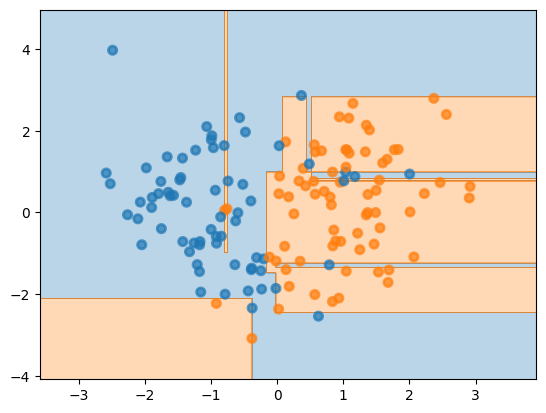

In [13]:
plot_surface(decision_tree, X_train, y_train)

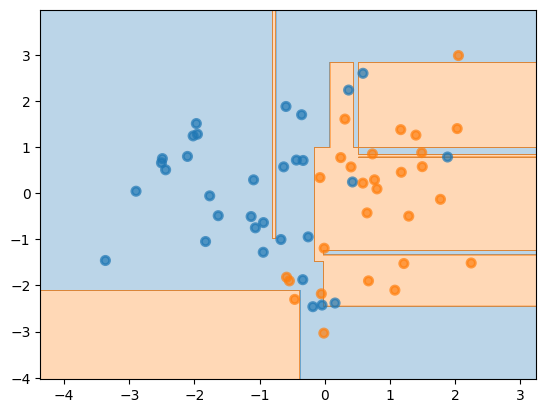

In [14]:
plot_surface(decision_tree, X_test, y_test)

__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [15]:
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
    edgecolors=np.array(palette)[y], linewidths=2)
    
    ax.plot([], [], label = 'train_acc : %0.5f' % train_acc)
    ax.plot([], [], label = 'test_acc : %0.5f' % test_acc)
    
    plt.legend(loc = 'lower right', prop={'size': 20})

In [16]:
max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 42) 

In [18]:
for d in max_depth_set:
    for l in min_samples_leaf_set:
        d_tree = DecisionTreeClassifier(max_depth=d, min_samples_leaf=l)
        d_tree.fit(X_train, y_train)
        ac_test = accuracy_score(y_test, d_tree.predict(X_test))
        ac_train = accuracy_score(y_train, d_tree.predict(X_train))
        print(f'for depth: {d} and min_samples_leaf: {l} accuracy at train: {ac_train}')
        print(f'for depth: {d} and min_samples_leaf: {l} accuracy at test: {ac_test}')



for depth: 6 and min_samples_leaf: 3 accuracy at train: 0.94375
for depth: 6 and min_samples_leaf: 3 accuracy at test: 0.8
for depth: 6 and min_samples_leaf: 5 accuracy at train: 0.925
for depth: 6 and min_samples_leaf: 5 accuracy at test: 0.8
for depth: 6 and min_samples_leaf: 7 accuracy at train: 0.9125
for depth: 6 and min_samples_leaf: 7 accuracy at test: 0.8
for depth: 6 and min_samples_leaf: 10 accuracy at train: 0.9
for depth: 6 and min_samples_leaf: 10 accuracy at test: 0.8
for depth: 7 and min_samples_leaf: 3 accuracy at train: 0.94375
for depth: 7 and min_samples_leaf: 3 accuracy at test: 0.8
for depth: 7 and min_samples_leaf: 5 accuracy at train: 0.925
for depth: 7 and min_samples_leaf: 5 accuracy at test: 0.8
for depth: 7 and min_samples_leaf: 7 accuracy at train: 0.9125
for depth: 7 and min_samples_leaf: 7 accuracy at test: 0.8
for depth: 7 and min_samples_leaf: 10 accuracy at train: 0.9
for depth: 7 and min_samples_leaf: 10 accuracy at test: 0.8
for depth: 8 and min_sampl

__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")
        
    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self
    
    def transform(self, X, y=None):
        
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        
        print("Трансформировали датасет!")
        return X_

In [21]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

In [31]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('transformer', CustomFunctionTransformer('x1',
                                              'x2',
                                              function=lambda x,y: 2*x - y)),
    ('dtree', DecisionTreeClassifier(max_depth=3))
])

pipeline.fit(X_train, y_train)


Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!


Pipeline(steps=[('transformer',
                 CustomFunctionTransformer(first_col='x1',
                                           function=<function <lambda> at 0x135dd9b40>,
                                           second_col='x2')),
                ('dtree', DecisionTreeClassifier(max_depth=3))])

In [32]:
accuracy_score(y_train, pipeline.predict(X_train))

Трансформировали датасет!


0.8625

In [33]:
accuracy_score(y_test, pipeline.predict(X_test))

Трансформировали датасет!


0.75